In [31]:
from mace.calculators import mace_mp
from ase import build

from ase.md import Langevin
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase import units
from ase import io
from ase.optimize import BFGS, LBFGS, FIRE, LBFGSLineSearch
# import fire



macemp = mace_mp(dispersion=True, default_dtype="float64") # return ASE calculator
macemp0 = mace_mp(dispersion=True, default_dtype="float64", model="medium")
macemp_omat = mace_mp(model="/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/MACE-MP-0/Notebooks_mace/mace_test/mace-omat-0-medium.model", dispersion=True, default_dtype="float64")

Using medium MPA-0 model as default MACE-MP model, to use previous (before 3.10) default model please specify 'medium' as model argument
Using Materials Project MACE for MACECalculator with /Users/joehart/.cache/mace/macempa0mediummodel
Using float64 for MACECalculator, which is slower but more accurate. Recommended for geometry optimization.


/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/MACE-MP-0/Notebooks_mace/mace_test/venv_mace/lib/python3.12/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


Using TorchDFTD3Calculator for D3 dispersion corrections
Using Materials Project MACE for MACECalculator with /Users/joehart/.cache/mace/20231203mace128L1_epoch199model
Using float64 for MACECalculator, which is slower but more accurate. Recommended for geometry optimization.
Using TorchDFTD3Calculator for D3 dispersion corrections
Using float64 for MACECalculator, which is slower but more accurate. Recommended for geometry optimization.


/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/MACE-MP-0/Notebooks_mace/mace_test/venv_mace/lib/python3.12/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)
/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/MACE-MP-0/Notebooks_mace/mace_test/venv_mace/lib/python3.12/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


Using TorchDFTD3Calculator for D3 dispersion corrections


In [32]:
from ase import Atoms
from ase.build import bulk
from ase.visualize import view
import numpy as np

# Define lattice parameter
a = 3.03  # Lattice constant in Å

# Define fractional coordinates for the Ti2CO2 monolayer
# Based on the described structure:
# - C atoms are sandwiched between Ti layers
# - O atoms terminate both sides

# Basis atoms in fractional coordinates
positions = [
    (0.0, 0.0, 0.5),  # C (middle layer)
    (1/3, 2/3, 0.35),  # Ti (bottom layer)
    (2/3, 1/3, 0.65),  # Ti (top layer)
    (1/3, 2/3, 0.80),  # O (top termination)
    (2/3, 1/3, 0.20),  # O (bottom termination)
]

# Atom types corresponding to positions
symbols = ["C", "Ti", "Ti", "O", "O"]

# Define hexagonal unit cell
cell = [
    [a, 0, 0],
    [-a/2, np.sqrt(3)/2 * a, 0],
    [0, 0, 20]
]

# Create the MXene monolayer
mxene_unit = Atoms(symbols=symbols, scaled_positions=positions, cell=cell, pbc=[True, True, False])

for atom in mxene_unit:
    if atom.symbol == 'O':
        if atom.position[2] < 0.5 * cell[2][2]:  # bottom O layer, fraction x cell parameter
            atom.tag = 1
        else:  # top O layer
            atom.tag = 3
    elif atom.symbol == 'C':
        atom.tag = 2
        
# Display the structure
view(mxene_unit, viewer='x3d')


In [28]:
mxene_unit.get_volume()

159.0178525920911

In [29]:
from ase.optimize import LBFGS
unit = mxene_unit.copy()
# use float64
unit.calc = macemp_omat

# Optimize the structure
optimiser = BFGS(unit)
optimiser.run(fmax=0.0001)

      Step     Time          Energy          fmax
BFGS:    0 17:04:41      -21.736588        1.373303


/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/MACE-MP-0/Notebooks_mace/mace_test/venv_mace/lib/python3.12/site-packages/torch_dftd/torch_dftd3_calculator.py:98: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:257.)
  cell: Optional[Tensor] = torch.tensor(


BFGS:    1 17:04:41      -21.791331        1.417086
BFGS:    2 17:04:41      -22.459076        1.910915
BFGS:    3 17:04:41      -23.360504        2.480044
BFGS:    4 17:04:41      -24.556408        3.150714
BFGS:    5 17:04:41      -26.174777        4.093520
BFGS:    6 17:04:42      -28.463393        5.299871
BFGS:    7 17:04:42      -31.383938        5.661777
BFGS:    8 17:04:42      -34.168865        4.461769
BFGS:    9 17:04:42      -35.929944        2.139687
BFGS:   10 17:04:42      -36.262999        1.004369
BFGS:   11 17:04:42      -36.296401        0.626684
BFGS:   12 17:04:42      -36.317930        0.456016
BFGS:   13 17:04:42      -36.414455        0.965998
BFGS:   14 17:04:42      -36.642677        1.798029
BFGS:   15 17:04:43      -36.874327        2.597332
BFGS:   16 17:04:43      -37.119422        3.375188
BFGS:   17 17:04:43      -37.376477        4.174395
BFGS:   18 17:04:43      -37.646462        4.933035
BFGS:   19 17:04:43      -37.830492        5.538900
BFGS:   20 1

True

In [33]:
from ase.optimize import LBFGS
unit = mxene_unit.copy()
# use float64
unit.calc = macemp0

# Optimize the structure
optimiser = BFGS(unit)
optimiser.run(fmax=0.0001)

      Step     Time          Energy          fmax
BFGS:    0 18:15:19      -22.690369        1.157840
BFGS:    1 18:15:19      -22.730908        1.171301
BFGS:    2 18:15:19      -23.252833        1.359632
BFGS:    3 18:15:19      -23.846217        1.610541
BFGS:    4 18:15:19      -24.541136        1.983402
BFGS:    5 18:15:19      -25.409421        2.612705
BFGS:    6 18:15:19      -26.609346        3.647223
BFGS:    7 18:15:19      -28.505259        5.381531
BFGS:    8 18:15:20      -31.559117        6.516630
BFGS:    9 18:15:20      -34.928496        5.337270
BFGS:   10 18:15:20      -37.100746        2.763385
BFGS:   11 18:15:20      -37.873645        0.752172
BFGS:   12 18:15:20      -37.936333        0.474698
BFGS:   13 18:15:20      -37.968920        0.731859
BFGS:   14 18:15:20      -38.010611        0.930034
BFGS:   15 18:15:20      -38.173843        1.450060
BFGS:   16 18:15:20      -38.378370        1.902691
BFGS:   17 18:15:20      -38.593578        2.410251
BFGS:   18 18:

True

In [34]:
io.write("structures/mxene_unit_relaxed_macemp0.xyz", unit)

In [30]:
unit.get_volume()

159.0178525920911

In [7]:
if atom.tag == 1:
    print("bottom O layer")

bottom O layer


In [8]:
mxene_unit.get_tags()

array([2, 0, 0, 3, 1])

In [79]:
io.write("mxene_unit.xyz", mxene_unit)

In [241]:
# Compute all interatomic distances
distances = mxene_unit.get_all_distances(mic=True)  # mic=True ensures minimum image convention

# Display the distance matrix
print("Interatomic Distance Matrix (Å):")
print(distances)

Interatomic Distance Matrix (Å):
[[ 0.          3.47279426  3.47279426  6.249824    6.249824  ]
 [ 3.47279426  0.          6.249824    9.          3.47279426]
 [ 3.47279426  6.249824    0.          3.47279426  9.        ]
 [ 6.249824    9.          3.47279426  0.         12.12684213]
 [ 6.249824    3.47279426  9.         12.12684213  0.        ]]


In [39]:
mxene_supercell = mxene_unit.repeat((4, 4, 1))
view(mxene_supercell, viewer='x3d')


In [9]:
from ase.build import add_vacuum

mxene_supercell = mxene_unit.repeat((4, 4, 1))
        
add_vacuum(mxene_supercell, 20.0)
# with the periodic boundary conditions in the z-direction, the vacuum layer makes sure that the interactions in the z-direction are negligible

# Visualize the structure
view(mxene_supercell, viewer='x3d')
#view(mxene_supercell)


In [13]:
mxene_flip = mxene_supercell.copy()
mxene_flip.rotate(180, 'y', center='COU')
view(mxene_flip, viewer='x3d')

In [15]:
graphene_atoms = build.graphene(formula='C2', a=2.46, size=(5, 5, 1), vacuum=3.5)
for atom in graphene_atoms:
    atom.tag = 10

view(graphene_atoms, viewer='x3d')

In [278]:
io.write("graphene_atoms.xyz", graphene_atoms)

In [ ]:
from ase.optimize import LBFGS

# use float64
graphene_atoms.calc = macemp

# Optimize the structure
optimiser = BFGS(graphene_atoms)
optimiser.run(fmax=0.0001)

      Step     Time          Energy          fmax
BFGS:    0 21:39:23     -464.621969        0.000000


/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/MACE-MP-0/Notebooks_mace/mace_test/venv_mace/lib/python3.12/site-packages/torch_dftd/torch_dftd3_calculator.py:98: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:257.)
  cell: Optional[Tensor] = torch.tensor(


True

In [88]:
from ase.io import Trajectory
from ase.optimize import LBFGS, BFGS, FIRE

# use float64
mxene_supercell.calc = macemp_omat
traj = Trajectory('mxene_supercell_optimization.traj', 'w', mxene_supercell)


# Optimize the structure
optimiser = BFGS(mxene_supercell)
optimiser.attach(traj.write, interval=1)
optimiser.run(fmax=0.0001, steps=5000)  # Converge until force is < 0.01 eV/A or max 5000 steps

      Step     Time          Energy          fmax
BFGS:    0 15:15:09     -347.785409        1.373303
BFGS:    1 15:15:10     -348.661299        1.417086
BFGS:    2 15:15:12     -359.345222        1.910915
BFGS:    3 15:15:13     -373.768063        2.480044
BFGS:    4 15:15:14     -392.902527        3.150714
BFGS:    5 15:15:15     -418.796438        4.093520
BFGS:    6 15:15:16     -455.414281        5.299871
BFGS:    7 15:15:18     -502.143006        5.661777
BFGS:    8 15:15:19     -546.701832        4.461769
BFGS:    9 15:15:20     -574.879111        2.139687
BFGS:   10 15:15:21     -580.207984        1.004369
BFGS:   11 15:15:23     -580.742411        0.626684
BFGS:   12 15:15:24     -581.086883        0.456016
BFGS:   13 15:15:25     -582.631283        0.965998
BFGS:   14 15:15:27     -586.282828        1.798029
BFGS:   15 15:15:28     -589.989227        2.597332
BFGS:   16 15:15:29     -593.910752        3.375188
BFGS:   17 15:15:31     -598.023636        4.174395
BFGS:   18 15:

True

In [89]:
from ase import io

io.write("relaxed_mxene.xyz", mxene_supercell)

In [3]:
mxene_relaxed = io.read("relaxed_mxene.xyz")
view(mxene_relaxed, viewer='x3d')

In [297]:
mxene_relaxed.cell

Cell([[12.12, 0.0, 0.0], [-6.06, 10.496227893867395, 0.0], [0.0, 0.0, 40.0]])

Using medium MPA-0 model as default MACE-MP model, to use previous (before 3.10) default model please specify 'medium' as model argument
Using Materials Project MACE for MACECalculator with /Users/joehart/.cache/mace/macempa0mediummodel
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.


/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/MACE-MP-0/Notebooks_mace/mace_test/venv_mace/lib/python3.12/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


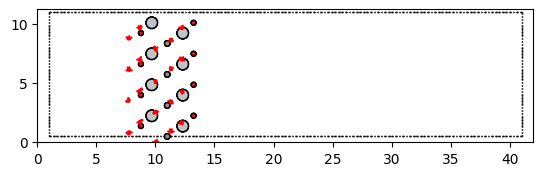

In [287]:
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms

mxene_relaxed.calc = macemp

fig, ax = plt.subplots()
plot_atoms(mxene_relaxed, ax, radii=0.3, rotation=('90x,90y,90z'))

forces = mxene_relaxed.get_forces()

# Add force vectors
for i, pos in enumerate(mxene_relaxed.get_positions()):
    ax.arrow(pos[2], pos[1], forces[i][0], forces[i][1], head_width=0.2, color='red')

plt.show()

### Building Heterostructures

In [4]:
go = graphene_atoms.copy()
goh = graphene_atoms.copy()


# Add epoxy groups for GO (C/O = 50)
oxygen_positions = []
carbon_positions = go.get_positions()
num_carbons = len(carbon_positions)
num_oxygens = num_carbons // 50  # C/O ratio of 50

for i in range(num_oxygens):
    carbon_idx = np.random.randint(0, num_carbons)
    pos = carbon_positions[carbon_idx] - np.array([0, 0, 1.2])  # below carbon plane (in between carbon and mxene)
    oxygen_positions.append(pos)

go.extend(Atoms('O' * num_oxygens, positions=oxygen_positions))

# Add -OH groups for GOH
oxygen_positions = []
hydrogen_positions = []
for i in range(num_oxygens):
    carbon_idx = np.random.randint(0, num_carbons)
    pos_o = carbon_positions[carbon_idx] - np.array([0, 0, 1.53])
    pos_h = pos_o - np.array([0, 0, 0.98])
    oxygen_positions.append(pos_o)
    hydrogen_positions.append(pos_h)

goh.extend(Atoms('O' * num_oxygens, positions=oxygen_positions))
goh.extend(Atoms('H' * num_oxygens, positions=hydrogen_positions))

for atom in go:
    if atom.symbol == 'O':
        atom.tag = 11
for atom in goh:
    if atom.symbol == 'O':
        atom.tag = 11
    elif atom.symbol == 'H':
        atom.tag = 12


def create_heterostructure(mxene, graphene_layer, height=4.0):
    # Stack MXene and graphene-based layer with a given interlayer spacing (height)
    graphene_layer = graphene_layer.copy()

    mxene_avg_top_C_z = np.mean([atom.position[2] for atom in mxene if atom.symbol == 'C'])
    mxene_avg_top_O_z = np.mean([atom.position[2] for atom in mxene if atom.symbol == 'O' and atom.position[2] > mxene_avg_top_C_z])
    print(mxene_avg_top_O_z)
    graphene_layer.positions[:, 2] += mxene_avg_top_O_z - np.average(graphene_layer.positions[:, 2]) + height
    print(np.max(graphene_layer.positions[:, 2]))
    heterostructure = mxene + graphene_layer

    return heterostructure



NameError: name 'graphene_atoms' is not defined

In [31]:
go

Atoms(symbols='C50O', pbc=[True, True, False], cell=[[12.3, 0.0, 0.0], [-6.15, 10.652112466548596, 0.0], [0.0, -0.0, 7.0]])

In [43]:
go.calc = macemp
optimiser = BFGS(go)
optimiser.run(fmax=0.001, steps=5000)

      Step     Time          Energy          fmax
BFGS:    0 22:00:16     -466.334633       16.454457
BFGS:    1 22:00:17     -467.927597        4.451209
BFGS:    2 22:00:17     -468.205533        3.478318
BFGS:    3 22:00:18     -468.566415        2.968103
BFGS:    4 22:00:19     -468.663538        1.722527
BFGS:    5 22:00:19     -468.796102        0.628646
BFGS:    6 22:00:20     -468.833940        0.530242
BFGS:    7 22:00:21     -468.874182        0.646424
BFGS:    8 22:00:22     -468.904315        0.629228
BFGS:    9 22:00:23     -468.926669        0.335797
BFGS:   10 22:00:24     -468.938448        0.172961
BFGS:   11 22:00:25     -468.945834        0.353407
BFGS:   12 22:00:26     -468.954522        0.363407
BFGS:   13 22:00:27     -468.960837        0.186859
BFGS:   14 22:00:28     -468.964531        0.107849
BFGS:   15 22:00:29     -468.967109        0.123572
BFGS:   16 22:00:30     -468.969718        0.144892
BFGS:   17 22:00:31     -468.972667        0.105868
BFGS:   18 22:

True

In [44]:
io.write("go_relax.xyz", go)


In [45]:
goh.calc = macemp
optimiser = BFGS(goh)
optimiser.run(fmax=0.001, steps=5000)

      Step     Time          Energy          fmax
BFGS:    0 22:00:48     -471.348997        5.701375
BFGS:    1 22:00:48     -471.842760        4.356274
BFGS:    2 22:00:49     -472.122347        1.472360
BFGS:    3 22:00:50     -472.386861        0.884158
BFGS:    4 22:00:51     -472.460479        0.640650
BFGS:    5 22:00:51     -472.520095        0.433661
BFGS:    6 22:00:52     -472.555998        0.481005
BFGS:    7 22:00:53     -472.588486        0.412117
BFGS:    8 22:00:55     -472.611609        0.328050
BFGS:    9 22:00:56     -472.627673        0.209204
BFGS:   10 22:00:57     -472.638971        0.138085
BFGS:   11 22:00:58     -472.648315        0.190450
BFGS:   12 22:00:59     -472.655636        0.170904
BFGS:   13 22:00:59     -472.660850        0.114060
BFGS:   14 22:01:00     -472.664557        0.100348
BFGS:   15 22:01:01     -472.667780        0.120780
BFGS:   16 22:01:01     -472.671242        0.127540
BFGS:   17 22:01:02     -472.675051        0.099802
BFGS:   18 22:

True

In [46]:
io.write("goh_relax.xyz", goh)

In [199]:
m_g = create_heterostructure(mxene_relaxed, graphene_atoms)
m_go = create_heterostructure(mxene_relaxed, go_relax)
m_goh = create_heterostructure(mxene_relaxed, goh_relax)

12.2415006
16.241500600000002
12.2415006
16.33538063254902
12.2415006
16.38204436346154


In [200]:
from ase import Atom

def add_sodium(heterostructure):
    
    heterostructure = heterostructure.copy()

    # find coords of top Ti layer and graphene layer
    # for hetreostructures with O, can't use the O layer avg as it includes the O or OH groups
    z_mxene = np.max([atom.z for atom in heterostructure if atom.symbol == 'Ti']) + 0.25  # top Ti layer with a small shift
    z_graphene = np.max([atom.z for atom in heterostructure if atom.symbol == 'C'])  # graphene's C layer

    # place Na ion halfway between MXene and graphene
    na_z = z_mxene + 0.5 * (z_graphene - z_mxene)

    # find the center of the heterostructure to place Na
    positions = heterostructure.get_positions()
    x_center = np.mean(positions[:, 0])  # x mean
    y_center = np.mean(positions[:, 1])  # y mean


    na_position = [x_center, y_center, na_z]

    # Add Na atom
    heterostructure += Atom('Na', na_position)

    return heterostructure

m_g_na = add_sodium(m_g)
m_go_na = add_sodium(m_go)
m_goh_na = add_sodium(m_goh)



In [201]:
view(m_g, viewer='x3d')

In [203]:
view(m_go, viewer='x3d')

In [205]:
view(m_goh, viewer='x3d')

In [206]:
view(m_g_na, viewer='x3d')

In [207]:
view(m_go_na, viewer='x3d')

In [208]:
view(m_goh_na, viewer='x3d')

Using medium MPA-0 model as default MACE-MP model, to use previous (before 3.10) default model please specify 'medium' as model argument
Using Materials Project MACE for MACECalculator with /Users/joehart/.cache/mace/macempa0mediummodel
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.


/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/MACE-MP-0/Notebooks_mace/mace_test/venv_mace/lib/python3.12/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


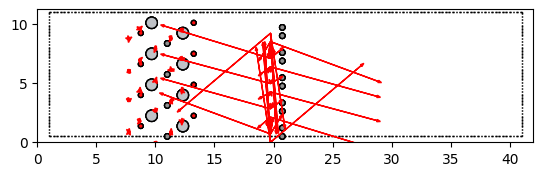

In [30]:
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms

fig, ax = plt.subplots()
plot_atoms(m_g, ax, radii=0.3, rotation=('90x,90y,90z'))

m_g.calc = macemp()
forces = m_g.get_forces()

# Add force vectors
for i, pos in enumerate(m_g.get_positions()):
    ax.arrow(pos[2], pos[1], forces[i][0], forces[i][1], head_width=0.2, color='red')

plt.show()

### Adhesion energies: testing interlayer spacing
$$E_{inter} = (E_M + E_G - E_{total}) /A$$
- A: interface area

In [209]:
m_g = create_heterostructure(mxene_relaxed, graphene_atoms, height=3.5)
m_go = create_heterostructure(mxene_relaxed, go_relax, height=3.5)
m_goh = create_heterostructure(mxene_relaxed, goh_relax, height=3.5)

12.2415006
15.7415006
12.2415006
15.83538063254902
12.2415006
15.882044363461539


In [213]:
graphene_atoms.calc = mace_mp()
m_g.calc = mace_mp()
m_go.calc = mace_mp()
m_goh.calc = mace_mp()

Using medium MPA-0 model as default MACE-MP model, to use previous (before 3.10) default model please specify 'medium' as model argument
Using Materials Project MACE for MACECalculator with /Users/joehart/.cache/mace/macempa0mediummodel
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.
Using medium MPA-0 model as default MACE-MP model, to use previous (before 3.10) default model please specify 'medium' as model argument
Using Materials Project MACE for MACECalculator with /Users/joehart/.cache/mace/macempa0mediummodel
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.


/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/MACE-MP-0/Notebooks_mace/mace_test/venv_mace/lib/python3.12/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)
/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/MACE-MP-0/Notebooks_mace/mace_test/venv_mace/lib/python3.12/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


Default dtype float32 does not match model dtype float64, converting models to float32.
Using medium MPA-0 model as default MACE-MP model, to use previous (before 3.10) default model please specify 'medium' as model argument
Using Materials Project MACE for MACECalculator with /Users/joehart/.cache/mace/macempa0mediummodel
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.
Using medium MPA-0 model as default MACE-MP model, to use previous (before 3.10) default model please specify 'medium' as model argument
Using Materials Project MACE for MACECalculator with /Users/joehart/.cache/mace/macempa0mediummodel
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.


/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/MACE-MP-0/Notebooks_mace/mace_test/venv_mace/lib/python3.12/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)
/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/MACE-MP-0/Notebooks_mace/mace_test/venv_mace/lib/python3.12/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


In [224]:
mxene_supercell.cell[0]

array([12.12,  0.  ,  0.  ])

In [227]:
def adhesion_energy(mxene, graphene, heterostructure, a=a):
    # a is the lattice constant of the MXene
    area = np.linalg.norm(np.cross(mxene.cell[0], mxene.cell[1]))  # cross product of the lattice vectors
    ad_energy = (mxene.get_total_energy() + graphene.get_total_energy() - heterostructure.get_total_energy()) / area
    return ad_energy * 100 # convert to eV/nm^2



In [228]:
adhesion_energy(mxene_relaxed, graphene_atoms, m_g), adhesion_energy(mxene_relaxed, go, m_go), adhesion_energy(mxene_relaxed, goh, m_goh)

(-5.424800469120926, -5.666130947847918, -5.687937051740844)

In [217]:
adhesion_energy(mxene_relaxed, graphene_atoms, m_g) *(1e9)**2 * 1.6e-19

-0.001388748920094957

### Geometry optimisation of heterostructures

In [183]:
from ase.optimize import BFGS, LBFGS, FIRE, LBFGSLineSearch
# import fire
m_g.calc = mace_mp()

# Optimize the structure
optimiser = BFGS(m_g)
optimiser.run(fmax=0.001, steps=5000)  # Converge until force is < 0.01 eV/A or max 5000 steps

Using medium MPA-0 model as default MACE-MP model, to use previous (before 3.10) default model please specify 'medium' as model argument
Using Materials Project MACE for MACECalculator with /Users/joehart/.cache/mace/macempa0mediummodel
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.


/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/MACE-MP-0/Notebooks_mace/mace_test/venv_mace/lib/python3.12/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


      Step     Time          Energy          fmax
BFGS:    0 23:40:46    -1169.289185       10.018680
BFGS:    1 23:40:47    -1171.365112        7.530853
BFGS:    2 23:40:48    -1174.282104        1.880798
BFGS:    3 23:40:48    -1174.727051        0.624708
BFGS:    4 23:40:49    -1174.847290        0.486573
BFGS:    5 23:40:50    -1174.974121        0.321342
BFGS:    6 23:40:51    -1174.995972        0.192229
BFGS:    7 23:40:52    -1175.020264        0.178408
BFGS:    8 23:40:53    -1175.044678        0.279010
BFGS:    9 23:40:54    -1175.081909        0.446027
BFGS:   10 23:40:54    -1175.117798        0.416913
BFGS:   11 23:40:55    -1175.149292        0.206186
BFGS:   12 23:40:56    -1175.181519        0.290309
BFGS:   13 23:40:57    -1175.237427        0.522777
BFGS:   14 23:40:58    -1175.349487        0.943766
BFGS:   15 23:40:58    -1175.568481        1.306786
BFGS:   16 23:40:59    -1175.892944        1.271926
BFGS:   17 23:41:00    -1176.157471        1.043815
BFGS:   18 23:

True

In [37]:
io.write("m_g_relaxed.xyz", m_g)

In [100]:
m_g_relaxed = io.read("structures/m_g_relaxed.xyz")
view(m_g_relaxed, viewer='x3d')

In [184]:
m_go.calc = mace_mp()

# Optimize the structure
optimiser = BFGS(m_go)
optimiser.run(fmax=0.001, steps=5000)  # Converge until force is < 0.01 eV/A or max 5000 steps

Using medium MPA-0 model as default MACE-MP model, to use previous (before 3.10) default model please specify 'medium' as model argument
Using Materials Project MACE for MACECalculator with /Users/joehart/.cache/mace/macempa0mediummodel
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.


/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/MACE-MP-0/Notebooks_mace/mace_test/venv_mace/lib/python3.12/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


      Step     Time          Energy          fmax
BFGS:    0 23:41:49    -1171.286865       16.969207
BFGS:    1 23:41:50    -1176.235596        5.070475
BFGS:    2 23:41:51    -1177.964478        3.546639
BFGS:    3 23:41:52    -1178.553345        2.243088
BFGS:    4 23:41:53    -1178.835205        1.769243
BFGS:    5 23:41:54    -1179.021484        1.865724
BFGS:    6 23:41:55    -1179.162231        0.780909
BFGS:    7 23:41:56    -1179.230347        0.393002
BFGS:    8 23:41:57    -1179.312134        0.459613
BFGS:    9 23:41:58    -1179.380371        0.697553
BFGS:   10 23:41:58    -1179.435303        0.600179
BFGS:   11 23:41:59    -1179.475098        0.257283
BFGS:   12 23:42:00    -1179.514648        0.531504
BFGS:   13 23:42:01    -1179.570801        0.770271
BFGS:   14 23:42:02    -1179.643555        0.707258
BFGS:   15 23:42:03    -1179.703857        0.384140
BFGS:   16 23:42:04    -1179.750366        0.344599
BFGS:   17 23:42:05    -1179.801270        0.555220
BFGS:   18 23:

KeyboardInterrupt: 

In [52]:
io.write("m_go_relaxed.xyz", m_go)

In [101]:
m_go_relaxed = io.read("structures/m_go_relaxed.xyz")
view(m_go_relaxed, viewer='x3d')

In [42]:
m_goh.calc = mace_mp()

# Optimize the structure
optimiser = BFGS(m_goh)
optimiser.run(fmax=0.001, steps=5000)  # Converge until force is < 0.01 eV/A or max 5000 steps

Using medium MPA-0 model as default MACE-MP model, to use previous (before 3.10) default model please specify 'medium' as model argument
Using Materials Project MACE for MACECalculator with /Users/joehart/.cache/mace/macempa0mediummodel
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.


/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/MACE-MP-0/Notebooks_mace/mace_test/venv_mace/lib/python3.12/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


      Step     Time          Energy          fmax
BFGS:    0 01:13:08    -1176.657471       10.052343
BFGS:    1 01:13:09    -1178.836914        8.055361
BFGS:    2 01:13:09    -1182.410400        2.115150
BFGS:    3 01:13:10    -1183.037598        2.048439
BFGS:    4 01:13:11    -1183.309448        1.331919
BFGS:    5 01:13:12    -1183.598267        1.007075
BFGS:    6 01:13:13    -1183.653076        0.872655
BFGS:    7 01:13:14    -1183.708374        0.818681
BFGS:    8 01:13:14    -1183.762817        0.510626
BFGS:    9 01:13:15    -1183.802368        0.353320
BFGS:   10 01:13:16    -1183.830444        0.388942
BFGS:   11 01:13:17    -1183.848877        0.343745
BFGS:   12 01:13:18    -1183.871948        0.341586
BFGS:   13 01:13:18    -1183.901733        0.477438
BFGS:   14 01:13:19    -1183.925659        0.489109
BFGS:   15 01:13:20    -1183.946655        0.410469
BFGS:   16 01:13:21    -1183.964111        0.372734
BFGS:   17 01:13:21    -1183.983032        0.363817
BFGS:   18 01:

True

In [46]:
io.write("structures/m_goh_relaxed.xyz", m_goh)

In [102]:
m_goh_relaxed = io.read("structures/m_goh_relaxed.xyz")
view(m_goh_relaxed, viewer='x3d')

### Geometry optimisation of heterostructures + Na ion

In [105]:
m_g_na.calc = mace_mp()

optimiser = BFGS(m_g_na)
optimiser.run(fmax=0.001, steps=5000)  # Converge until force is < 0.01 eV/A or max 5000 steps

Using medium MPA-0 model as default MACE-MP model, to use previous (before 3.10) default model please specify 'medium' as model argument
Using Materials Project MACE for MACECalculator with /Users/joehart/.cache/mace/macempa0mediummodel
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.


/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/MACE-MP-0/Notebooks_mace/mace_test/venv_mace/lib/python3.12/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


      Step     Time          Energy          fmax
BFGS:    0 14:43:12    -1172.189575       10.062214
BFGS:    1 14:43:13    -1174.002808        8.014041
BFGS:    2 14:43:14    -1177.336914        2.032341
BFGS:    3 14:43:15    -1177.780762        0.747702
BFGS:    4 14:43:15    -1177.898193        0.639174
BFGS:    5 14:43:16    -1178.032104        0.535166
BFGS:    6 14:43:17    -1178.049316        0.490329
BFGS:    7 14:43:17    -1178.071289        0.392754
BFGS:    8 14:43:18    -1178.087646        0.290883
BFGS:    9 14:43:19    -1178.103271        0.253303
BFGS:   10 14:43:20    -1178.109253        0.124892
BFGS:   11 14:43:21    -1178.111328        0.109865
BFGS:   12 14:43:21    -1178.112915        0.102747
BFGS:   13 14:43:22    -1178.115479        0.120975
BFGS:   14 14:43:23    -1178.118042        0.123483
BFGS:   15 14:43:24    -1178.120117        0.095922
BFGS:   16 14:43:24    -1178.120850        0.108505
BFGS:   17 14:43:26    -1178.121460        0.114686
BFGS:   18 14:

True

In [112]:
io.write("m_g_na_relaxed.xyz", m_g_na)

In [103]:
m_g_na_relaxed = io.read("structures/m_g_na_relaxed.xyz")
view(m_g_na_relaxed, viewer='x3d')

In [106]:
m_go_na.calc = mace_mp()

optimiser = BFGS(m_go_na)
optimiser.run(fmax=0.001, steps=5000)  # Converge until force is < 0.01 eV/A or max 5000 steps

Using medium MPA-0 model as default MACE-MP model, to use previous (before 3.10) default model please specify 'medium' as model argument
Using Materials Project MACE for MACECalculator with /Users/joehart/.cache/mace/macempa0mediummodel
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.


/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/MACE-MP-0/Notebooks_mace/mace_test/venv_mace/lib/python3.12/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


      Step     Time          Energy          fmax
BFGS:    0 14:44:43    -1182.792480        0.712844
BFGS:    1 14:44:44    -1182.818726        0.655565
BFGS:    2 14:44:45    -1182.845337        0.596760
BFGS:    3 14:44:46    -1182.862549        0.532570
BFGS:    4 14:44:46    -1182.893188        0.440902
BFGS:    5 14:44:47    -1182.923828        0.383556
BFGS:    6 14:44:48    -1182.947266        0.282022
BFGS:    7 14:44:49    -1182.957642        0.287984
BFGS:    8 14:44:49    -1182.964722        0.306844
BFGS:    9 14:44:50    -1182.973389        0.325126
BFGS:   10 14:44:51    -1182.985352        0.346354
BFGS:   11 14:44:52    -1183.001465        0.371478
BFGS:   12 14:44:54    -1183.020752        0.396560
BFGS:   13 14:44:55    -1183.045410        0.413713
BFGS:   14 14:44:56    -1183.075806        0.409484
BFGS:   15 14:44:58    -1183.105957        0.440997
BFGS:   16 14:44:59    -1183.157471        0.509241
BFGS:   17 14:44:59    -1183.204590        0.576911
BFGS:   18 14:

True

In [114]:
io.write("m_go_na_relaxed.xyz", m_go_na)

In [50]:
m_go_na_relaxed = io.read("structures/m_go_na_relaxed.xyz")
view(m_go_na_relaxed, viewer='x3d')

In [106]:
from ase.io.trajectory import Trajectory

m_goh_na.calc = mace_mp()

#m_goh_na.wrap()
traj = Trajectory('m_goh_na_optimization.traj', 'w', m_goh_na)

optimiser = BFGS(m_goh_na)
#optimiser.attach(traj.write, interval=10)
optimiser.run(fmax=0.001, steps=5000)  # Converge until force is < 0.01 eV/A or max 5000 steps

Using medium MPA-0 model as default MACE-MP model, to use previous (before 3.10) default model please specify 'medium' as model argument
Using Materials Project MACE for MACECalculator with /Users/joehart/.cache/mace/macempa0mediummodel
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.


/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/MACE-MP-0/Notebooks_mace/mace_test/venv_mace/lib/python3.12/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


      Step     Time          Energy          fmax
BFGS:    0 19:45:32    -1177.817993       13.460908
BFGS:    1 19:45:33    -1180.448730        9.796075
BFGS:    2 19:45:34    -1184.441162        3.498530
BFGS:    3 19:45:35    -1185.185425        2.822892
BFGS:    4 19:45:36    -1185.468750        1.433366
BFGS:    5 19:45:37    -1185.806885        0.673503
BFGS:    6 19:45:38    -1185.865601        0.774781
BFGS:    7 19:45:39    -1185.971680        0.708089
BFGS:    8 19:45:40    -1186.063721        0.545445
BFGS:    9 19:45:41    -1186.136841        0.463729
BFGS:   10 19:45:42    -1186.182129        0.486954
BFGS:   11 19:45:43    -1186.224487        0.475173
BFGS:   12 19:45:44    -1186.274536        0.571878
BFGS:   13 19:45:45    -1186.322632        0.773642
BFGS:   14 19:45:46    -1186.368286        0.757484
BFGS:   15 19:45:48    -1186.412842        0.800267
BFGS:   16 19:45:49    -1186.498291        1.121537
BFGS:   17 19:45:50    -1186.614502        1.333065
BFGS:   18 19:

True

In [108]:
io.write("m_goh_na_relaxed.xyz", m_goh_na)

In [109]:
m_goh_na_relaxed = io.read("structures/m_goh_na_relaxed.xyz")
view(m_goh_na_relaxed, viewer='x3d')

### MD of heterostructures

In [139]:
# Interlayer spacing calculation

# more complicated as first seems -> need to make a robust function to handle:
#   - Two O layers (close and far from graphene)
#   - C layer in MXene and graphene
#   - when we functionalise graphene with O groups, we can't use the O layer avg as it includes the O or OH groups


def top_mxene_O(atom, atoms):
    # checks if O is neighbour of Ti and on the side facing graphene
    return any(neighbor.symbol == 'Ti' and atom.position[2] > neighbor.position[2] for neighbor in atoms)

def graphene_C(atom, atoms, cutoff=2.5):
    # graphene C atoms are not bonded to Ti atoms
    # typical C-Ti bond length is ~2.2 A
    
    return not any(neighbor.symbol == 'Ti' and np.linalg.norm(atom.position - neighbor.position) < cutoff 
                   for neighbor in atoms)

def interlayer_spacing(atoms):
    # define interlayer spacing as the distance between avg C z positions in graphene and 
    # the avg O z postions in mxene's O layer closest to graphene
    
    
    graphene_C_atoms = [atom.position[2] for atom in atoms if atom.symbol == 'C' and graphene_C(atom, atoms)]

    # Get MXene oxygens (excluding functional groups)
    mxene_O_atoms = [atom.position[2] for atom in atoms if atom.symbol == 'O' and top_mxene_O(atom, atoms)]


    # Compute average z-positions
    avg_z_C = np.mean(graphene_C_atoms)
    avg_z_O = np.mean(mxene_O_atoms)

    # Compute interlayer spacing (MXene O above Graphene C)
    return avg_z_C - avg_z_O

In [141]:
from ase.io.trajectory import Trajectory
from ase.md import Langevin, NoseHooverChainNVT, Bussi
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
#from interlayer_spacing import interlayer_spacing

def printenergy(a=m_g_relaxed):
    """Function to print the potential, kinetic and total energy"""
    epot = a.get_potential_energy() / len(a)
    ekin = a.get_kinetic_energy() / len(a)
    print('Energy per atom: Epot = %.3feV  Ekin = %.3feV (T=%3.0fK)  '
          'Etot = %.3feV' % (epot, ekin, ekin / (1.5 * units.kB), epot + ekin))
    

spacing_filename = "interlayer_spacing_m_g.txt"
open(spacing_filename, "w").close() # overwrite file with new data instead of appending

def write_interlayer_spacing(atoms=m_g_relaxed):
    spacing = interlayer_spacing(atoms)
    if spacing is not None:
        with open(spacing_filename, "a") as f:
            f.write(f"{spacing:.3f}\n")

    
m_g_relaxed.calc = mace_mp()


T_init = 300  # Initial temperature in K
MaxwellBoltzmannDistribution(m_g_relaxed, temperature_K=T_init)

print(f"Initial kinetic energy: {m_g_relaxed.get_kinetic_energy():.3f} eV")


# Set up the Langevin dynamics engine for NVT ensemble.
dyn = Bussi(m_g_relaxed, 0.5 * units.fs, T_init, 0.01)
n_steps = 200 # Number of steps to run


dyn.attach(printenergy, interval = 10) # observer: attach the printenergy function to the dynamics
dyn.attach(write_interlayer_spacing, interval=10)

traj = Trajectory('mg_Bussi.traj', 'w', m_g_relaxed) # save the trajectory
dyn.attach(traj.write, interval = 10) # write the trajectory to file
printenergy()
dyn.run(n_steps)

Using medium MPA-0 model as default MACE-MP model, to use previous (before 3.10) default model please specify 'medium' as model argument
Using Materials Project MACE for MACECalculator with /Users/joehart/.cache/mace/macempa0mediummodel
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.
Initial kinetic energy: 5.247 eV


/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/MACE-MP-0/Notebooks_mace/mace_test/venv_mace/lib/python3.12/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


Energy per atom: Epot = -9.008eV  Ekin = 0.040eV (T=312K)  Etot = -8.968eV
Energy per atom: Epot = -9.008eV  Ekin = 0.040eV (T=312K)  Etot = -8.968eV
Energy per atom: Epot = -9.009eV  Ekin = 0.037eV (T=286K)  Etot = -8.972eV
Energy per atom: Epot = -9.011eV  Ekin = 0.039eV (T=299K)  Etot = -8.972eV
Energy per atom: Epot = -9.012eV  Ekin = 0.039eV (T=303K)  Etot = -8.973eV
Energy per atom: Epot = -9.010eV  Ekin = 0.036eV (T=281K)  Etot = -8.973eV
Energy per atom: Epot = -9.009eV  Ekin = 0.034eV (T=264K)  Etot = -8.975eV
Energy per atom: Epot = -9.007eV  Ekin = 0.035eV (T=268K)  Etot = -8.972eV


KeyboardInterrupt: 

In [54]:
def printenergy(a=m_go_relaxed):
    """Function to print the potential, kinetic and total energy"""
    epot = a.get_potential_energy() / len(a)
    ekin = a.get_kinetic_energy() / len(a)
    print('Energy per atom: Epot = %.3feV  Ekin = %.3feV (T=%3.0fK)  '
          'Etot = %.3feV' % (epot, ekin, ekin / (1.5 * units.kB), epot + ekin))
    
    
m_go_relaxed.calc = macemp


T_init = 300  # Initial temperature in K
MaxwellBoltzmannDistribution(m_go_relaxed, temperature_K=T_init)

print(f"Initial kinetic energy: {m_go_relaxed.get_kinetic_energy():.3f} eV")


# Set up the Langevin dynamics engine for NVT ensemble.
dyn = Langevin(m_go_relaxed, 0.5 * units.fs, T_init * units.kB, 0.002)
n_steps = 1000 # Number of steps to run


dyn.attach(printenergy, interval = 100) # observer: attach the printenergy function to the dynamics

traj = Trajectory('mgo_LV.traj', 'w', m_go_relaxed) # save the trajectory
dyn.attach(traj.write, interval = 10) # write the trajectory to file
printenergy()
dyn.run(n_steps)

Initial kinetic energy: 5.236 eV


/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/MACE-MP-0/Notebooks_mace/mace_test/venv_mace/lib/python3.12/site-packages/ase/md/md.py:52: FutureWarning: Specify the temperature in K using the 'temperature_K' argument
  warnings.warn(FutureWarning(w))


Energy per atom: Epot = -9.009eV  Ekin = 0.040eV (T=309K)  Etot = -8.969eV
Energy per atom: Epot = -9.009eV  Ekin = 0.040eV (T=309K)  Etot = -8.969eV
Energy per atom: Epot = -8.987eV  Ekin = 0.018eV (T=142K)  Etot = -8.969eV
Energy per atom: Epot = -8.987eV  Ekin = 0.019eV (T=146K)  Etot = -8.969eV
Energy per atom: Epot = -8.989eV  Ekin = 0.021eV (T=160K)  Etot = -8.969eV
Energy per atom: Epot = -8.990eV  Ekin = 0.022eV (T=167K)  Etot = -8.968eV
Energy per atom: Epot = -8.989eV  Ekin = 0.021eV (T=161K)  Etot = -8.968eV
Energy per atom: Epot = -8.986eV  Ekin = 0.019eV (T=147K)  Etot = -8.967eV
Energy per atom: Epot = -8.989eV  Ekin = 0.022eV (T=173K)  Etot = -8.967eV
Energy per atom: Epot = -8.991eV  Ekin = 0.024eV (T=189K)  Etot = -8.966eV
Energy per atom: Epot = -8.986eV  Ekin = 0.020eV (T=154K)  Etot = -8.966eV
Energy per atom: Epot = -8.987eV  Ekin = 0.022eV (T=168K)  Etot = -8.966eV


True

In [55]:
def printenergy(a=m_goh_relaxed):
    """Function to print the potential, kinetic and total energy"""
    epot = a.get_potential_energy() / len(a)
    ekin = a.get_kinetic_energy() / len(a)
    print('Energy per atom: Epot = %.3feV  Ekin = %.3feV (T=%3.0fK)  '
          'Etot = %.3feV' % (epot, ekin, ekin / (1.5 * units.kB), epot + ekin))
    
    
m_goh_relaxed.calc = macemp


T_init = 300  # Initial temperature in K
MaxwellBoltzmannDistribution(m_goh_relaxed, temperature_K=T_init)

print(f"Initial kinetic energy: {m_goh_relaxed.get_kinetic_energy():.3f} eV")


# Set up the Langevin dynamics engine for NVT ensemble.
dyn = Langevin(m_goh_relaxed, 0.5 * units.fs, T_init * units.kB, 0.002)
n_steps = 1000 # Number of steps to run


dyn.attach(printenergy, interval = 100) # observer: attach the printenergy function to the dynamics

traj = Trajectory('mgoh_LV.traj', 'w', m_goh_relaxed) # save the trajectory
dyn.attach(traj.write, interval = 10) # write the trajectory to file
printenergy()
dyn.run(n_steps)

Initial kinetic energy: 4.559 eV
Energy per atom: Epot = -8.986eV  Ekin = 0.035eV (T=267K)  Etot = -8.951eV
Energy per atom: Epot = -8.986eV  Ekin = 0.035eV (T=267K)  Etot = -8.951eV
Energy per atom: Epot = -8.966eV  Ekin = 0.015eV (T=119K)  Etot = -8.951eV
Energy per atom: Epot = -8.968eV  Ekin = 0.019eV (T=145K)  Etot = -8.950eV
Energy per atom: Epot = -8.967eV  Ekin = 0.017eV (T=133K)  Etot = -8.950eV
Energy per atom: Epot = -8.970eV  Ekin = 0.021eV (T=161K)  Etot = -8.949eV
Energy per atom: Epot = -8.967eV  Ekin = 0.019eV (T=147K)  Etot = -8.948eV
Energy per atom: Epot = -8.967eV  Ekin = 0.019eV (T=147K)  Etot = -8.948eV
Energy per atom: Epot = -8.968eV  Ekin = 0.021eV (T=161K)  Etot = -8.947eV
Energy per atom: Epot = -8.969eV  Ekin = 0.021eV (T=166K)  Etot = -8.947eV
Energy per atom: Epot = -8.966eV  Ekin = 0.019eV (T=151K)  Etot = -8.947eV
Energy per atom: Epot = -8.967eV  Ekin = 0.021eV (T=159K)  Etot = -8.946eV


True

### MD of heterostructures + Na ion

In [46]:
def printenergy(a=m_g_na_relaxed):
    """Function to print the potential, kinetic and total energy"""
    epot = a.get_potential_energy() / len(a)
    ekin = a.get_kinetic_energy() / len(a)
    print('Energy per atom: Epot = %.3feV  Ekin = %.3feV (T=%3.0fK)  '
          'Etot = %.3feV' % (epot, ekin, ekin / (1.5 * units.kB), epot + ekin))
    
    
m_g_na_relaxed.calc = macemp


T_init = 300  # Initial temperature in K
MaxwellBoltzmannDistribution(m_g_na_relaxed, temperature_K=T_init)

print(f"Initial kinetic energy: {m_g_na_relaxed.get_kinetic_energy():.3f} eV")


# Set up the Langevin dynamics engine for NVT ensemble.
#dyn = Langevin(m_g_na_relaxed, 0.5 * units.fs, T_init * units.kB, 0.002)
dyn = Bussi(m_g_na_relaxed, 0.5 * units.fs, T_init, 0.01)
n_steps = 200 # Number of steps to run


dyn.attach(printenergy, interval = 10) # observer: attach the printenergy function to the dynamics

traj = Trajectory('m_g_na_Bussi.traj', 'w', m_g_na_relaxed) # save the trajectory
dyn.attach(traj.write, interval = 10) # write the trajectory to file
printenergy()
dyn.run(n_steps)

Initial kinetic energy: 5.601 eV
Energy per atom: Epot = -8.951eV  Ekin = 0.043eV (T=331K)  Etot = -8.908eV
Energy per atom: Epot = -8.951eV  Ekin = 0.043eV (T=331K)  Etot = -8.908eV
Energy per atom: Epot = -8.950eV  Ekin = 0.041eV (T=321K)  Etot = -8.908eV
Energy per atom: Epot = -8.949eV  Ekin = 0.044eV (T=342K)  Etot = -8.905eV
Energy per atom: Epot = -8.949eV  Ekin = 0.041eV (T=321K)  Etot = -8.908eV
Energy per atom: Epot = -8.952eV  Ekin = 0.038eV (T=290K)  Etot = -8.915eV
Energy per atom: Epot = -8.957eV  Ekin = 0.038eV (T=291K)  Etot = -8.919eV
Energy per atom: Epot = -8.959eV  Ekin = 0.038eV (T=294K)  Etot = -8.921eV
Energy per atom: Epot = -8.966eV  Ekin = 0.041eV (T=315K)  Etot = -8.925eV
Energy per atom: Epot = -8.966eV  Ekin = 0.041eV (T=320K)  Etot = -8.925eV
Energy per atom: Epot = -8.971eV  Ekin = 0.040eV (T=306K)  Etot = -8.931eV
Energy per atom: Epot = -8.973eV  Ekin = 0.036eV (T=276K)  Etot = -8.938eV
Energy per atom: Epot = -8.970eV  Ekin = 0.035eV (T=270K)  Etot = -

True

In [56]:
def remove_com_motion(atoms, directions=[True, True, False]):
    """
    Remove center-of-mass motion in specified directions.
    directions=[True, True, False] removes motion in x and y but keeps z motion.
    """
    momenta = atoms.get_momenta()
    mass = atoms.get_masses()
    com_momentum = np.sum(momenta.T * mass, axis=1) / np.sum(mass)

    for i, remove in enumerate(directions):
        if remove:
            momenta[:, i] -= com_momentum[i]  # Remove COM motion in x or y

    atoms.set_momenta(momenta)

In [ ]:
def printenergy(a=m_go_na_relaxed):
    """Function to print the potential, kinetic and total energy"""
    epot = a.get_potential_energy() / len(a)
    ekin = a.get_kinetic_energy() / len(a)
    print('Energy per atom: Epot = %.3feV  Ekin = %.3feV (T=%3.0fK)  '
          'Etot = %.3feV' % (epot, ekin, ekin / (1.5 * units.kB), epot + ekin))
    
    
m_go_na_relaxed.calc = macemp


T_init = 300  # Initial temperature in K
MaxwellBoltzmannDistribution(m_go_na_relaxed, temperature_K=T_init)
remove_com_motion(m_go_na_relaxed)

print(f"Initial kinetic energy: {m_go_na_relaxed.get_kinetic_energy():.3f} eV")


# Set up the Langevin dynamics engine for NVT ensemble.
dyn = Bussi(m_go_na_relaxed, 0.5 * units.fs, T_init, 0.01)
n_steps = 200 # Number of steps to run


dyn.attach(printenergy, interval = 10) # observer: attach the printenergy function to the dynamics

traj = Trajectory('m_go_na.traj', 'w', m_go_na_relaxed) # save the trajectory
dyn.attach(traj.write, interval = 10) # write the trajectory to file
printenergy()
dyn.run(n_steps)

Initial kinetic energy: 5.338 eV
Energy per atom: Epot = -8.977eV  Ekin = 0.040eV (T=313K)  Etot = -8.937eV
Energy per atom: Epot = -8.977eV  Ekin = 0.040eV (T=313K)  Etot = -8.937eV
Energy per atom: Epot = -8.965eV  Ekin = 0.037eV (T=284K)  Etot = -8.928eV
Energy per atom: Epot = -8.954eV  Ekin = 0.037eV (T=288K)  Etot = -8.916eV
Energy per atom: Epot = -8.942eV  Ekin = 0.034eV (T=261K)  Etot = -8.908eV
Energy per atom: Epot = -8.927eV  Ekin = 0.038eV (T=296K)  Etot = -8.889eV
Energy per atom: Epot = -8.931eV  Ekin = 0.038eV (T=292K)  Etot = -8.894eV
Energy per atom: Epot = -8.931eV  Ekin = 0.037eV (T=283K)  Etot = -8.895eV
Energy per atom: Epot = -8.932eV  Ekin = 0.037eV (T=288K)  Etot = -8.895eV
Energy per atom: Epot = -8.934eV  Ekin = 0.038eV (T=296K)  Etot = -8.896eV
Energy per atom: Epot = -8.935eV  Ekin = 0.039eV (T=305K)  Etot = -8.895eV
Energy per atom: Epot = -8.936eV  Ekin = 0.040eV (T=309K)  Etot = -8.896eV
Energy per atom: Epot = -8.939eV  Ekin = 0.043eV (T=333K)  Etot = -

True

In [55]:
def printenergy(a=m_goh_na_relaxed):
    """Function to print the potential, kinetic and total energy"""
    epot = a.get_potential_energy() / len(a)
    ekin = a.get_kinetic_energy() / len(a)
    print('Energy per atom: Epot = %.3feV  Ekin = %.3feV (T=%3.0fK)  '
          'Etot = %.3feV' % (epot, ekin, ekin / (1.5 * units.kB), epot + ekin))
    
    
m_goh_na_relaxed.calc = macemp


T_init = 300  # Initial temperature in K
MaxwellBoltzmannDistribution(m_goh_na_relaxed, temperature_K=T_init)

print(f"Initial kinetic energy: {m_goh_na_relaxed.get_kinetic_energy():.3f} eV")


# Set up the Langevin dynamics engine for NVT ensemble.
dyn = Bussi(m_goh_na_relaxed, 0.5 * units.fs, T_init, 0.01)
n_steps = 200 # Number of steps to run


dyn.attach(printenergy, interval = 10) # observer: attach the printenergy function to the dynamics

traj = Trajectory('m_goh_na.traj', 'w', m_goh_na_relaxed) # save the trajectory
dyn.attach(traj.write, interval = 10) # write the trajectory to file
printenergy()
dyn.run(n_steps)

Initial kinetic energy: 4.805 eV
Energy per atom: Epot = -8.937eV  Ekin = 0.036eV (T=280K)  Etot = -8.900eV
Energy per atom: Epot = -8.937eV  Ekin = 0.036eV (T=280K)  Etot = -8.900eV
Energy per atom: Epot = -8.925eV  Ekin = 0.037eV (T=288K)  Etot = -8.888eV
Energy per atom: Epot = -8.914eV  Ekin = 0.035eV (T=271K)  Etot = -8.879eV
Energy per atom: Epot = -8.902eV  Ekin = 0.037eV (T=287K)  Etot = -8.865eV
Energy per atom: Epot = -8.888eV  Ekin = 0.038eV (T=295K)  Etot = -8.850eV
Energy per atom: Epot = -8.894eV  Ekin = 0.040eV (T=306K)  Etot = -8.854eV
Energy per atom: Epot = -8.892eV  Ekin = 0.036eV (T=279K)  Etot = -8.856eV
Energy per atom: Epot = -8.892eV  Ekin = 0.036eV (T=281K)  Etot = -8.855eV
Energy per atom: Epot = -8.891eV  Ekin = 0.038eV (T=291K)  Etot = -8.854eV
Energy per atom: Epot = -8.888eV  Ekin = 0.033eV (T=256K)  Etot = -8.855eV
Energy per atom: Epot = -8.888eV  Ekin = 0.034eV (T=263K)  Etot = -8.854eV
Energy per atom: Epot = -8.890eV  Ekin = 0.037eV (T=287K)  Etot = -

True